# 9장 데이터 시각화 알아보기

- 판다스는 그래프를 처리하는 matplotlib 모듈과 seaborn 모듈로 데이터를 시각화하는 기능을 기본으로 제공
- 참고문서 : 
  - Pyplot의 개요와 작성기초 : https://kongdols-room.tistory.com/81  
  - 

In [199]:
%load_ext watermark
%watermark -v -p numpy,scipy,sklearn,pandas,matplotlib

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.8.5
IPython 7.19.0

numpy 1.18.5
scipy 1.5.4
sklearn 0.0
pandas 1.1.3
matplotlib 3.3.2


In [200]:
import warnings     # 파이썬 기본적인 경고메세지 처리하기     

warnings.filterwarnings(action='ignore')      # 기본적인 경고메세지 무시하기 
# warnings.filterwarnings(action='default')    # 기본적인 경고메세지 기본값으로 표시하기   

In [201]:
import pandas as pd
import matplotlib.pyplot as plt   # pyplot을 활용하여 plt를 넣어줄 것 

- Jupyter Notebook에서 그래프를 별도의 창에 표시하지 않고 내부에 출력하기 위해서는 
  - %matplotlib inline 명령을 실행해야 한다.  

In [202]:
%matplotlib inline

##  예제 9-1 그래프 틀과 세부 그래프 표시하기

### 한글서체 세팅  
- matplotlib에서는 기본적으로 한글이 지원되지 않는다.  
- 작업을 하기전에 먼저 
  - matplotlib의 폰트를 변경해야 한다.   
  - 아래의 소스를 통해서 변경할 수가 있고  
  - 그 중에 Windows부분을 보면 맑은고딕체로 기본 서체가 적용된 것을 확인할 수가 있다.  
- MatPlotLib에서 한글 폰트 세팅에 관한 설명 
  - 참고주소 : https://financedata.github.io/posts/matplotlib-hangul-for-windows-anaconda.html  

In [203]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [204]:
import numpy as np

In [205]:
x = np.linspace(0, 2*np.pi, 30)   # np.pi값을 계산한 결과와 30개를 선택한다.  
y = np.sin(x)                     # 변수 x의 sin값을 선택한다.     

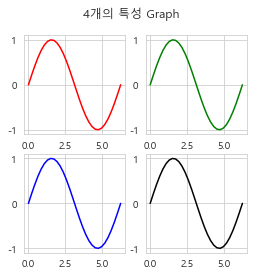

In [206]:
fig, axes = plt.subplots(2,2,figsize=(4,4))   # 창크기(figsize=(4,4)) 인 것을 2X2 로 나열하여 나타내겠다. 
axes[0,0].plot(x,y, 'r')        # red 
axes[0,1].plot(x,y, 'g')        # green 
axes[1,0].plot(x,y, 'b')        # blue 
axes[1,1].plot(x,y, 'k')        # black 
for ax in axes.ravel():
    ax.margins(0.05)
    
fig.suptitle(" 4개의 특성 Graph ")    # 총 4개의 그래프가 그려질 틀을 형성함  

plt.show()

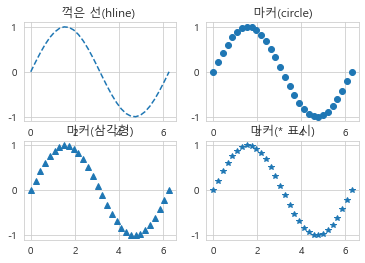

In [207]:
fig = plt.figure()

ax1 = fig.add_subplot(221)    # 4 개의 그래프를 그리기 위한 간격조정 
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.plot(x,y, '--')
ax2.plot(x,y, 'o')
ax3.plot(x,y, "^")
ax4.plot(x,y, '*')

ax1.set_title(" 꺽은 선(hline)  ")
ax2.set_title(" 마커(circle) ")
ax3.set_title(" 마커(삼각형) ")
ax4.set_title(" 마커(* 표시) ")

plt.show()

##  예제 9-2 그래프에 세부 정보 표시하기

In [208]:
import os 

os.getcwd()

'C:\\Users\\sw\\1-2-PyProjects\\3-2-손에 잡히는 Pandas\\HIP-09장 예제'

In [209]:
%%writefile '../data/data1.txt'
0 0
1 1
2 4
3 9
4 16
5 25
6 36

Overwriting ../data/data1.txt


In [210]:
ff = open('../data/data1.txt','r')

In [211]:
xx = [[float(s) for s in line.split()] for line in ff]
xx

[[0.0, 0.0],
 [1.0, 1.0],
 [2.0, 4.0],
 [3.0, 9.0],
 [4.0, 16.0],
 [5.0, 25.0],
 [6.0, 36.0]]

In [212]:
[*xx]     

[[0.0, 0.0],
 [1.0, 1.0],
 [2.0, 4.0],
 [3.0, 9.0],
 [4.0, 16.0],
 [5.0, 25.0],
 [6.0, 36.0]]

In [213]:
x,y = zip(*xx)
x

(0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0)

In [214]:
y

(0.0, 1.0, 4.0, 9.0, 16.0, 25.0, 36.0)

In [215]:
ff.close()

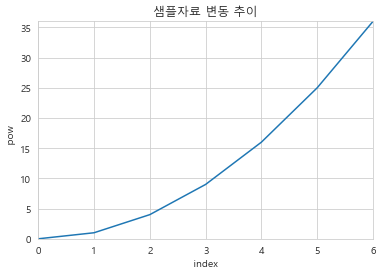

In [216]:
with open('../data/data1.txt','r') as f :
    X, Y = zip(*[[float(s) for s in line.split()] for line in f])
    
plt.xlabel(" index ")
plt.ylabel(" pow   ")
plt.title('샘플자료 변동 추이')        # , fontproperties=fontprop1 

plt.axis([0,6,0,36])
    
plt.plot(X,Y)
plt.show()

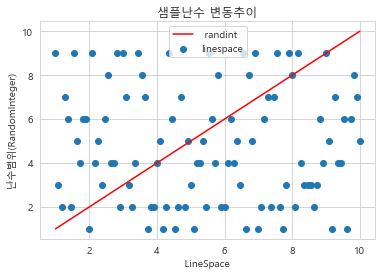

In [217]:
x = np.linspace(1,10, 100)
y = np.random.randint(1,10,100)
plt.scatter(x,y,label="linespace")
plt.plot(x,x,'r',label=" randint")

plt.xlabel(" LineSpace ")
plt.ylabel(" 난수범위(RandomInteger) ")
plt.title('샘플난수 변동추이')                                  # , fontproperties=fontprop1
plt.legend()

plt.show()

- 참고문서 : 
  - Windows용 GPU Driver 설치 : https://m.blog.naver.com/chandong83/221112939772   
  - Tensorflow설치 

In [218]:
# ! pip install tensorflow

In [219]:
! conda list tensorflow

# packages in environment at C:\COSMOS\Anaconda3\envs\pyenv3:
#
# Name                    Version                   Build  Channel
tensorflow                2.3.1                    pypi_0    pypi
tensorflow-estimator      2.3.0                    pypi_0    pypi


In [220]:
import tensorflow as tf

In [221]:
a= np.array([1,2,3,4,5,6], dtype=np.float32)
b= np.array([2,3,4,4,7,7], dtype=np.float32)
c=tf.matmul(a.reshape(3,2),b.reshape(2,3))


In [222]:
# sess=tf.Session()
# a=sess.run(c)
# for i, row in enumerate(a):
#    x =np.arange(len(row))
#    plt.bar(x+(0.25*i),row,color= (lambda i: ("b g r".split())[i])(i), width=0.25)
    
# plt.show()
# print(a)

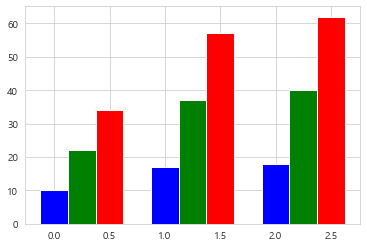

tf.Tensor(
[[10. 17. 18.]
 [22. 37. 40.]
 [34. 57. 62.]], shape=(3, 3), dtype=float32)


In [223]:
for i, row in enumerate(c):      # Tensorflow 2.3 Version에서 Session() 부분이 안되어서 막아놓았슴 
    x =np.arange(len(row))
    plt.bar(x+(0.25*i),row,color= (lambda i: ("b g r".split())[i])(i), width=0.25)
    
plt.show()
print(c)

In [224]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

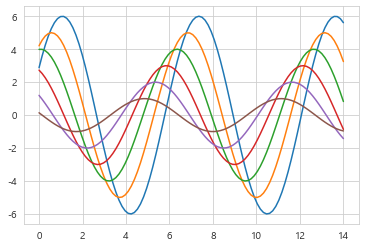

In [225]:
sinplot()

In [226]:
import seaborn as sns

In [227]:
sns.set_style('darkgrid')

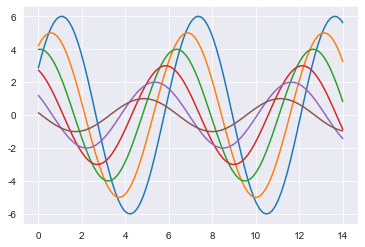

In [228]:
sinplot()

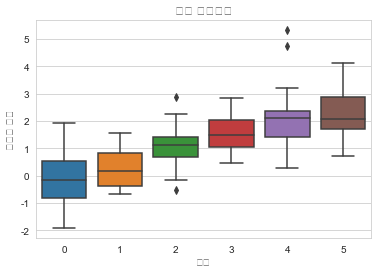

In [229]:
sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2   # 정규분포(normal distribution) 자료로 가져와라. 
sns.boxplot(data=data)

plt.xlabel("증분")
plt.ylabel("임의의 난수")
plt.title('난수 변동추이')              #  fontproperties=fontprop1
plt.show()

## 예제 9-3  한글 처리하기

In [230]:
plt.rcParams['font.size']

10.0

In [231]:
plt.rcParams['font.family']

['sans-serif']

In [232]:
rc_s = pd.Series(plt.rcParams) 
rc_s

_internal.classic_mode     False
agg.path.chunksize             0
animation.avconv_args         []
animation.avconv_path     avconv
animation.bitrate             -1
                           ...  
ytick.minor.right           True
ytick.minor.size               2
ytick.minor.visible        False
ytick.minor.width            0.6
ytick.right                False
Length: 305, dtype: object

In [233]:
rc_s.shape

(305,)

In [234]:
import sys

In [235]:
sys.platform       # OS 검사 

'win32'

In [236]:
import matplotlib.font_manager as fm

In [237]:
if sys.platform == 'win32' :
    font_path = 'C:/Windows/Fonts/malgun.ttf'          # 맑은 고딕서체를 기본으로 사용 HANBatang.ttf'
    fontprop = fm.FontProperties(fname=font_path, size=16)
    
    path_pen = 'C:/Windows/Fonts/malgunbd.ttf'
    fontprop1 = fm.FontProperties(fname=path_pen, size=16)

In [238]:
if sys.platform == 'darwin'  :
    path = '/Users/plusjune/Library/Fonts/NanumMyeongjo.ttf'
    fontprop = fm.FontProperties(fname=path, size=16)
    path_pen = '/Users/plusjune/Library/Fonts/NanumPen.ttf'
    fontprop1 = fm.FontProperties(fname=path_pen, size=30)

In [239]:
plt.rcParams['font.family']

['sans-serif']

In [240]:
if sys.platform == 'win32' :
    from matplotlib import font_manager, rc
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

In [241]:
plt.rcParams['font.family']

['Malgun Gothic']

In [242]:
import numpy as np

In [243]:
data = np.random.randint(1000, 6000, 50)

In [244]:
data

array([5349, 5588, 1723, 5957, 3947, 3820, 1687, 5683, 3989, 4947, 3827,
       4839, 1639, 2061, 5423, 2606, 1015, 5189, 4811, 5612, 2580, 3022,
       3130, 4833, 5008, 1871, 4106, 3072, 3443, 5788, 3606, 2464, 1046,
       1958, 2871, 3938, 1743, 4937, 4099, 1710, 1750, 2548, 2911, 3848,
       1577, 3022, 5923, 4473, 4954, 5879])

In [245]:
import matplotlib.pyplot as plt

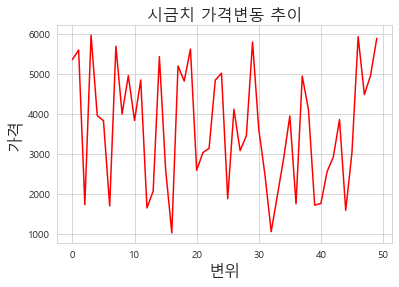

In [246]:
plt.xlabel('변위', fontproperties=fontprop)      # fontprop : 사전에 정의된 형태를 재사용(OS에서 PreDefine) 
plt.ylabel('가격', fontproperties=fontprop)
plt.title('시금치 가격변동 추이', fontproperties=fontprop)
plt.plot(range(50), data, 'r')
plt.show()

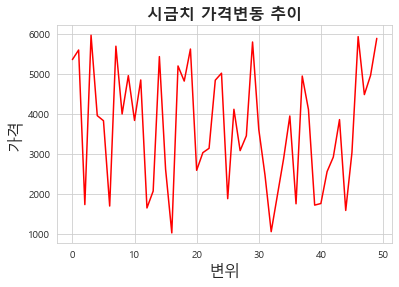

In [247]:
plt.plot(range(50), data, 'r')

plt.xlabel('변위', fontproperties=fontprop)      # fontprop : 사전에 정의된 형태를 재사용(OS에서 PreDefine) 
plt.ylabel('가격', fontproperties=fontprop)
plt.title('시금치 가격변동 추이', fontproperties=fontprop1)
plt.show()

## 예제 9-4  plot 그래프 그리기

In [248]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2020', periods=1000))

In [249]:
ts = ts.cumsum()

In [250]:
ts.head()

2020-01-01    0.887338
2020-01-02    0.772127
2020-01-03    2.023674
2020-01-04    2.952080
2020-01-05    3.224684
Freq: D, dtype: float64

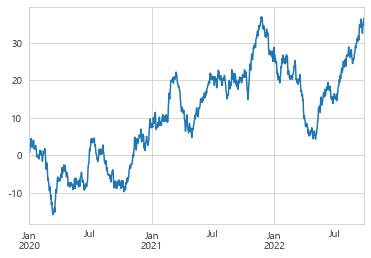

In [251]:
ts.plot()
plt.show()

In [252]:
ts.plot

In [253]:
for i in dir(ts.plot) :
    if not i.startswith("_") :
        print(i, end=",  ")

area,  bar,  barh,  box,  density,  hexbin,  hist,  kde,  line,  pie,  scatter,  

In [254]:
ts.plot.line

<bound method PlotAccessor.line of <pandas.plotting._core.PlotAccessor object at 0x000002292745F160>>

In [255]:
ts.plot.line.__func__

<function pandas.plotting._core.PlotAccessor.line(self, x=None, y=None, **kwargs)>

<AxesSubplot:>

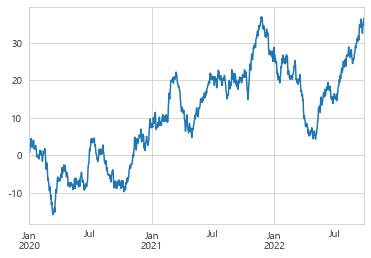

In [256]:
ts.plot.line()

<AxesSubplot:>

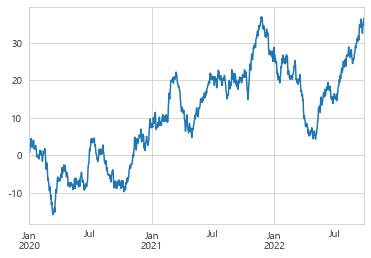

In [257]:
ts.plot(kind='line')

In [258]:
ts.index[:10]

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [259]:
df = pd.DataFrame(np.random.randn(1000, 4), 
                  index=ts.index, 
                  columns=list('가나다라'))

In [260]:
df = df.cumsum()

In [261]:
df.head()

,가,나,다,라
2020-01-01,0.793340,-1.634890,0.282629,0.590921
2020-01-02,1.147276,-0.526502,0.559484,-0.612679
2020-01-03,-0.503465,-1.191256,0.017126,-0.155678
2020-01-04,-1.222666,0.204138,0.145129,0.182384
2020-01-05,-1.942316,0.818072,-0.438119,-0.423682


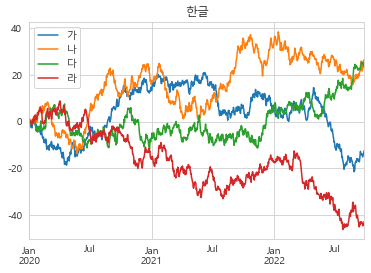

In [262]:
df.plot(title="한글")
plt.show()

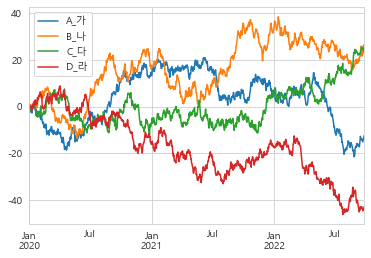

In [263]:
df.plot.line().legend(['A_가','B_나','C_다','D_라'])

<AxesSubplot:xlabel='가'>

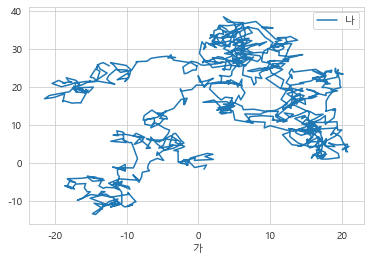

In [264]:
df.plot(x='가', y=['나'])

In [265]:
plt.rcParams['axes.unicode_minus'] = False

<AxesSubplot:xlabel='가'>

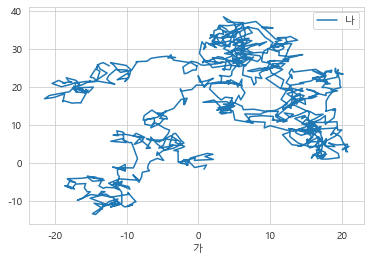

In [266]:
df.plot(x='가', y=['나'])

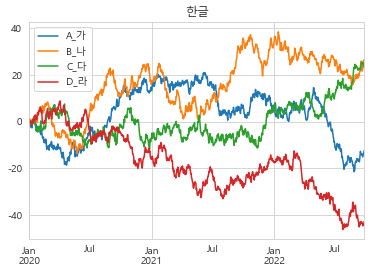

In [267]:
fig, ax = plt.subplots()

ax = df.plot(title="한글",kind='line',ax=ax).legend(['A_가','B_나','C_다','D_라'])

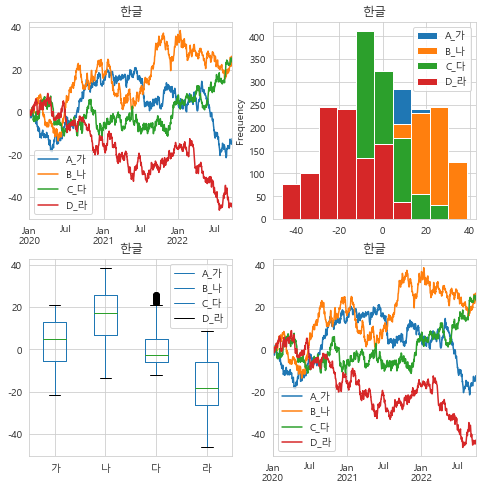

In [268]:
fig, axes = plt.subplots(2,2,figsize=(8,8))
axes[0,0] = df.plot(title="한글",kind='line',ax=axes[0,0]).legend(['A_가','B_나','C_다','D_라'])
axes[0,1] = df.plot(title="한글",kind='hist',ax=axes[0,1]).legend(['A_가','B_나','C_다','D_라'])
axes[1,0] = df.plot(title="한글",kind='box',ax=axes[1,0]).legend(['A_가','B_나','C_다','D_라'])
axes[1,1] = df.plot(title="한글",kind='line',ax=axes[1,1]).legend(['A_가','B_나','C_다','D_라'])

## 예제 9-5  복잡한 plot 그래프 그리기

In [269]:
import numpy as np

In [270]:
ser = pd.Series(np.random.randn(10000))

#### MatplotLib의 Font 관리(한글깨짐)에 관한 참고사항 
- 관련문서 : http://taewan.kim/post/matplotlib_hangul/   
- Matplotlib를 사용할 때 항상 문제가 되는 부분은 한글 폰트 에러입니다. 
  - 데이터를 전처리하여 이미지를 생성하는 방식으로 실행되는 **Matplotlib은 기본 설정으로 한글을 지원하지 않습니다.** 
  - **한글을 사용하기 위해서는 한글 폰트를 명시적으로 지정**해야 합니다. 
  - *한글 폰트가 설치되어 있지 않거나, 한글 폰트를 지정을 하지 않으면 <그림 1>과 한글 이 깨지는 현상이 발생*합니다.
  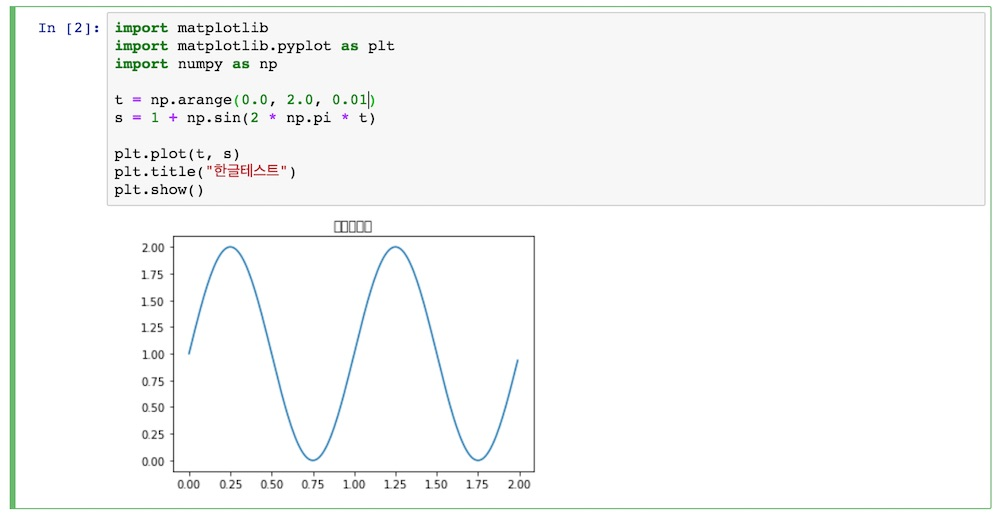

#### Matplotlib 한글 폰트 지정
- Matplotlib로 차트에서 한글을 사용하기 위해서는, 
  - 앞에서 **확인한 폰트 이름을 rc 파라미터로 값으로 설정**해야 합니다. 
  - 이 코드는 *plt.show() 함수 앞에 위치*해야 합니다. 
  - 아래 그림과 같이 
  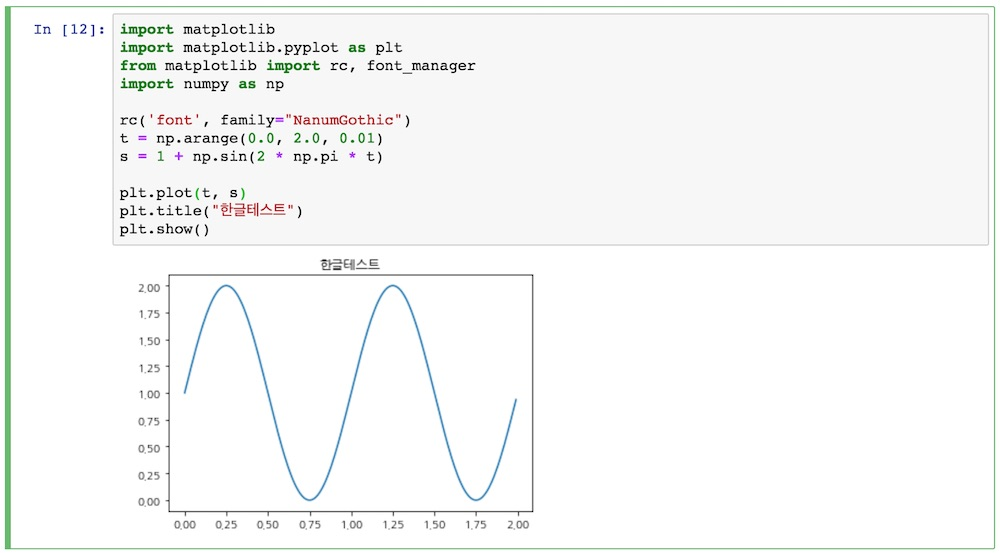



#### unicode_minus 메소드를 사용하여 폰트 깨짐 문제 해결
- 한글 사용시 마이머스 폰트가 깨지는 문제가 발생할 수 있습니다. 
- 이 문제는 다음 설정으로 해결할 수 있습니다.
  - import matplotlib as mpl 
  - mpl.rcParams['axes.unicode_minus'] = False  


- 폰트 상세 설정은 다음과 같습니다.
  - plt.rcParams["font.size"] = 12
  - plt.rcParams["font.family"] = 'NanumGothic'
  - plt.rcParams['xtick.labelsize'] = 12.
  - plt.rcParams['ytick.labelsize'] = 12.

In [271]:
plt.rcParams['axes.unicode_minus'] = False   # 한글 폰트가 깨짐을 해결 
                                              # 해당 서체가 없으면 윈도우에서 제공된 기본서체로 대체 

<AxesSubplot:ylabel='Density'>

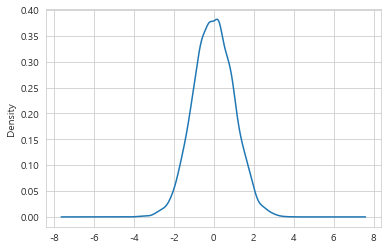

In [272]:
ser.plot.kde()

In [273]:
ser1 = pd.Series(np.random.rand(10000))

<AxesSubplot:ylabel='Density'>

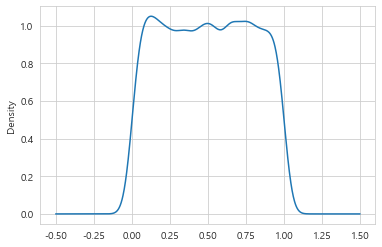

In [274]:
ser1.plot.kde()

In [275]:
import seaborn as sns

In [276]:
df = sns.load_dataset('iris')     # iris(붓꽃에 관한 샘플데이터)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [277]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:>

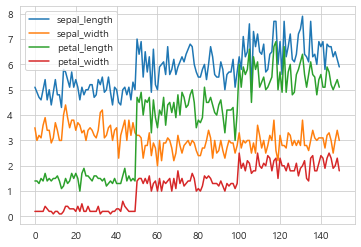

In [278]:
df.plot()

In [279]:
df.species.value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [280]:
from pandas.plotting import andrews_curves

<AxesSubplot:>

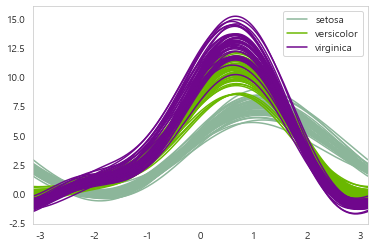

In [281]:
andrews_curves(df, 'species')

In [282]:
from pandas.plotting import parallel_coordinates

<AxesSubplot:>

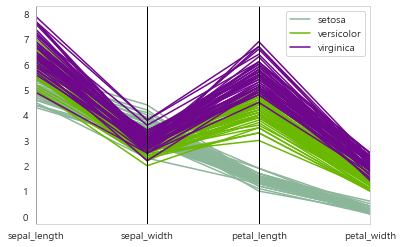

In [283]:
parallel_coordinates(df, 'species')

In [284]:
from pandas.plotting import autocorrelation_plot

In [285]:
import numpy as np

In [286]:
dr = pd.date_range(start='2017-01-01', end='2017-12-31')

df = pd.DataFrame(np.arange(len(dr)), index=dr, columns=["Values"])

In [287]:
df.head()

,Values
2017-01-01,0
2017-01-02,1
2017-01-03,2
2017-01-04,3
2017-01-05,4


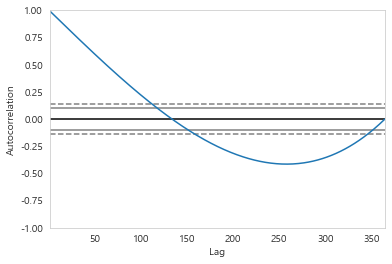

In [288]:
autocorrelation_plot(df)
plt.show()

In [289]:
import numpy as np

In [290]:
data = pd.Series(np.random.rand(1000))

<AxesSubplot:>

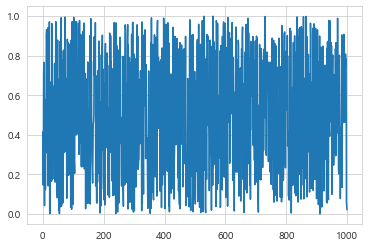

In [291]:
data.plot()

<AxesSubplot:ylabel='Frequency'>

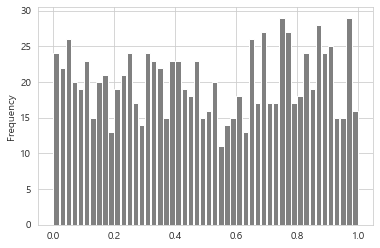

In [292]:
data.plot.hist(bins=50,rwidth=0.9, color='grey')

In [293]:
from pandas.plotting import bootstrap_plot

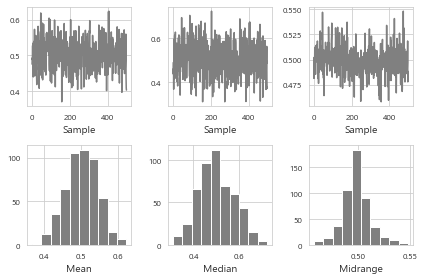

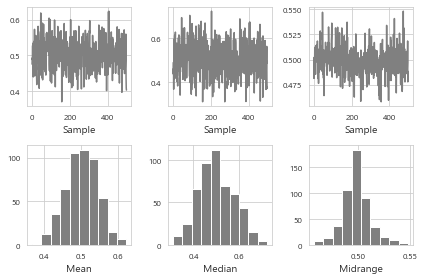

In [294]:
bootstrap_plot(data, size=50, samples=500, color='grey')

In [295]:
import numpy as np

In [296]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

<AxesSubplot:>

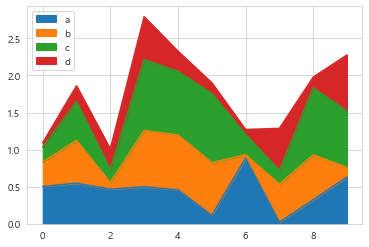

In [297]:
df.plot.area()

<AxesSubplot:>

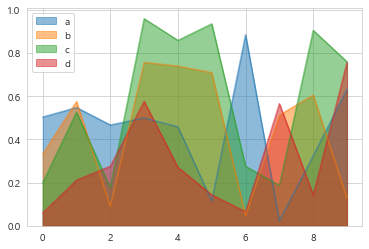

In [298]:
df.plot.area(stacked=False)

In [299]:
import pandas as pd

In [300]:
import matplotlib.pyplot as plt
%matplotlib inline

## 예제 9-6  점 그래프 그리기

In [301]:
import seaborn as sns

In [302]:
df_a = sns.load_dataset('tips')

In [303]:
df_a.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

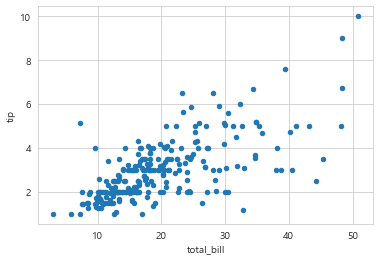

In [304]:
df_a.plot.scatter('total_bill','tip')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

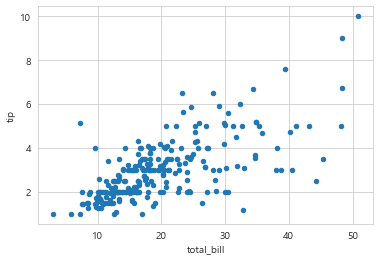

In [305]:
df_a.plot(kind='scatter',x='total_bill',y='tip')

In [306]:
from pandas.plotting import lag_plot

In [307]:
import numpy as np

In [308]:
data = pd.Series(0.1 * np.random.rand(1000) +
                 0.9 * np.sin(np.linspace(-99 * np.pi, 99 * np.pi, num=1000)))

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

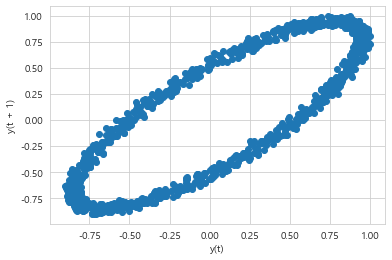

In [309]:
lag_plot(data)

In [310]:
from pandas.plotting import radviz

In [311]:
df_i = sns.load_dataset('iris')

<AxesSubplot:>

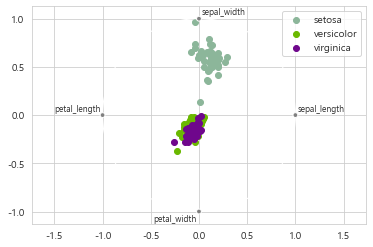

In [312]:
radviz(df_i, 'species')

## 예제 9-7  히스토그램 그래프 그리기

In [313]:
import numpy as np

In [314]:
mu = 100
sigma = 10

In [315]:
np.random.seed(0)

x = np.random.normal(mu,sigma,10000)

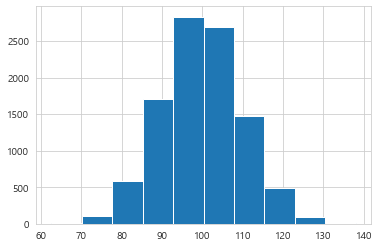

In [316]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.hist(x)

plt.show()

In [317]:
import seaborn as sns

In [318]:
df_a = sns.load_dataset('tips')

In [319]:
df_a.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:ylabel='Frequency'>

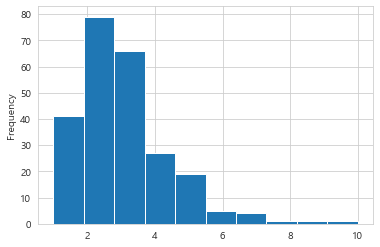

In [320]:
df_a['tip'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

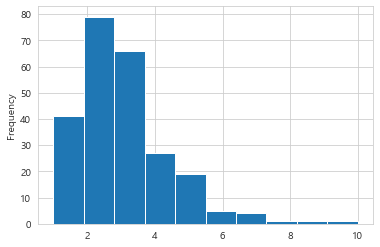

In [321]:
df_a['tip'].plot.hist()

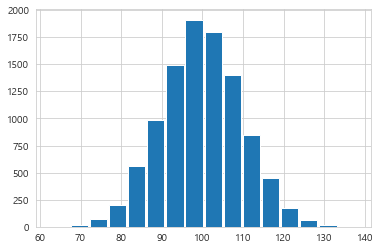

In [322]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.hist(x, rwidth=0.9, bins=16)

plt.show()

<AxesSubplot:ylabel='Frequency'>

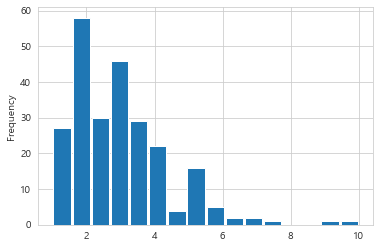

In [323]:
df_a['tip'].plot(kind='hist',bins=16, rwidth=0.9)

In [324]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
              'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])

<AxesSubplot:ylabel='Frequency'>

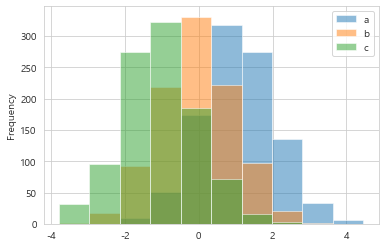

In [325]:
df4.plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

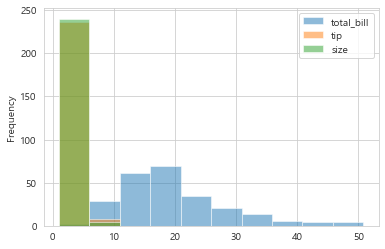

In [326]:
df_a.plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

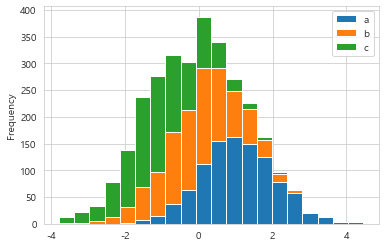

In [327]:
df4.plot.hist(stacked=True, bins=20)

<AxesSubplot:xlabel='Frequency'>

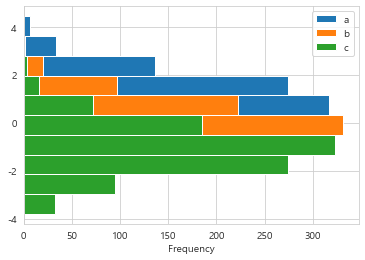

In [328]:
df4.plot.hist(orientation='horizontal')

In [329]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2016', periods=1000))

In [330]:
df = pd.DataFrame(np.random.randn(1000, 4), 
                  index=ts.index, 
                  columns=list('ABCD'))

<AxesSubplot:ylabel='Frequency'>

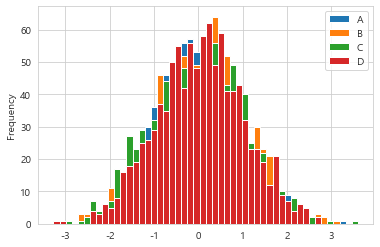

In [331]:
df.plot.hist(bins=50)

In [332]:
df['A'].head()

2016-01-01   -0.706413
2016-01-02    0.465122
2016-01-03   -2.678413
2016-01-04   -0.015170
2016-01-05    0.975021
Freq: D, Name: A, dtype: float64

<AxesSubplot:>

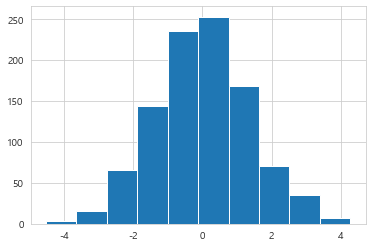

In [333]:
df['A'].diff().hist()

In [334]:
df.diff().head()

,A,B,C,D
2016-01-01,NaN,NaN,NaN,NaN
2016-01-02,1.171535,-0.068667,-1.760642,-1.443059
2016-01-03,-3.143535,0.736521,-0.080661,-1.116249
2016-01-04,2.663243,-1.247057,0.972963,0.673785
2016-01-05,0.990191,-1.144344,-0.271189,-1.461556


array([[<AxesSubplot:title={'center':'A'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'C'}>,
        <AxesSubplot:title={'center':'D'}>]], dtype=object)

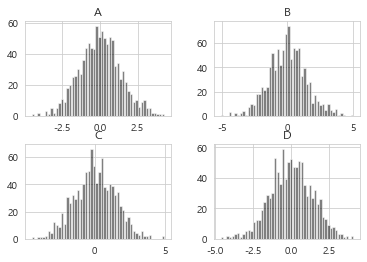

In [335]:
df.diff().hist(rwidth=0.9, color='k', alpha=0.5, bins=50)

In [336]:
data = pd.Series(np.random.randn(1000))

In [337]:
data.head()

0    0.006014
1    0.752771
2    0.232441
3    0.591500
4   -1.021144
dtype: float64

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

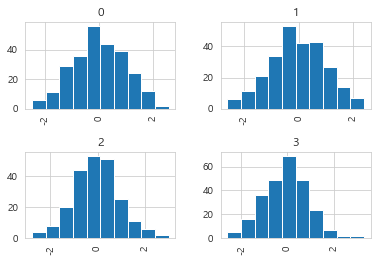

In [338]:
data.hist(by=np.random.randint(0, 4, 1000), figsize=(6, 4))

### 실제 데이터의 범위 와 타이틀 세팅

   . hist 메소드 내의 range에 범위 지정
   . set_title 로 그래프 제목 지정 

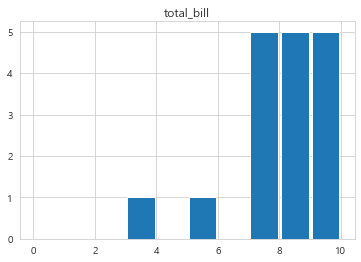

In [339]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.hist(df_a['total_bill'],range=(0,10), rwidth=0.9)
ax.set_title('total_bill')

plt.show()

####  타이틀을 표시하기

<AxesSubplot:title={'center':'tip'}, ylabel='Frequency'>

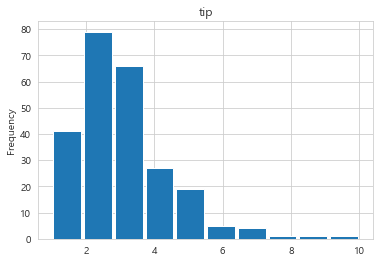

In [340]:
df_a['tip'].plot(kind='hist',bins=10, rwidth=0.9, title='tip')

## 예제 9-8  파이 그래프 그리기


In [341]:
import numpy as np

In [342]:
data = np.linspace(0,10,30).reshape(10,3)
index= ['a','b','c','d','e','f','g','h','i','j']

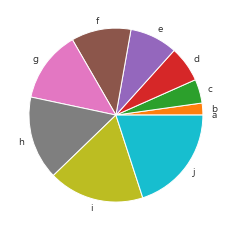

In [343]:
plt.pie(data[:,0],labels=index)
plt.show()

In [344]:
from matplotlib.pyplot import pie, axis, show

df = pd.DataFrame({
    'Sex': ['female', 'male', 'female'],
    'Smoke': [1, 1, 1]})

In [345]:
sums = df.Smoke.groupby(df.Sex).sum()
print(sums)

Sex
female    2
male      1
Name: Smoke, dtype: int64


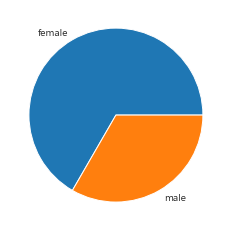

In [346]:
axis('auto')               # normal 이  적용되지 않아서 변경 처리함  
pie(sums, labels=sums.index)
show()

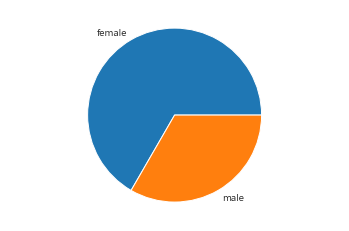

In [347]:
axis('equal')
pie(sums, labels=sums.index)
show()

#### style — 축 제한과 스케일링
- tight | fill | equal | image | square | vis3d | normal

- 수동, 자동, 반자동 중 하나로 축 제한 선택으로, 다음 표에 있는 값 중 하나로 지정됩니다.  
- 축 설정값 
  - manual : 모든 축 제한을 현재 값으로 고정합니다.  
     - XLimMode, YLimMode, ZLimMode를 'manual'로 설정합니다.
     - 극좌표 좌표축으로 작업하는 경우 이 옵션은 ThetaLimMode와 RLimMode를 'manual'로 설정합니다. 
  - auto : 모든 축 제한을 자동으로 선택합니다.  
     - XLimMode, YLimMode, ZLimMode를 'auto'로 설정합니다. 
     - 극좌표 좌표축으로 작업하는 경우 이 옵션은 ThetaLimMode와 RLimMode를 'auto'로 설정합니다.
  - 'auto x' :  x축 제한을 자동으로 선택합니다.  
    - XLimMode를 'auto'로 설정합니다.  
  - 'auto y' :  y축 제한을 자동으로 선택합니다.  
    - YLimMode를 'auto'로 설정합니다.  
  - 'auto z' :  z축 제한을 자동으로 선택합니다.   
    - ZLimMode를 'auto'로 설정합니다.  
  -  'auto xy' : x축 제한과 y축 제한을 자동으로 선택합니다.  
  - 'auto xz' : x축 제한과 z축 제한을 자동으로 선택합니다.  
  - 'auto yz' : y축 제한과 z축 제한을 자동으로 선택합니다.  

In [348]:
import seaborn as sns

In [349]:
df_a = sns.load_dataset('tips')

In [350]:
df_a.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [351]:
ser = df_a['time']

In [352]:
ser.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

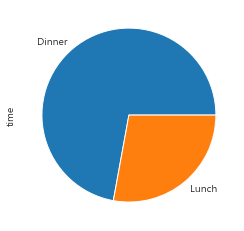

In [353]:
ser.value_counts().plot(kind='pie', labels=ser.value_counts().index)
plt.show()

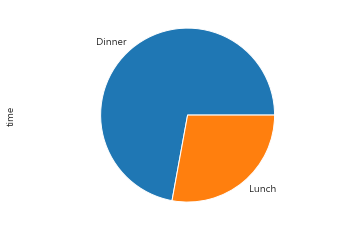

In [354]:
axis('equal')
ser.value_counts().plot.pie(labels=ser.value_counts().index)
plt.show()

## 예제 9-9  상자 그래프 그리기

In [355]:
import numpy as np

In [356]:
df_b = pd.DataFrame(np.random.random((6,10)))

In [357]:
df_b.head()

,0,1,2,3,4,5,6,7,8,9
0,0.845662,0.074485,0.882506,0.580129,0.946892,0.180054,0.772033,0.608870,0.670553,0.393756
1,0.179450,0.996842,0.831118,0.291287,0.505930,0.702724,0.227868,0.300599,0.908234,0.407301
2,0.405074,0.981862,0.147393,0.109743,0.636485,0.823172,0.458884,0.396073,0.799711,0.606471
3,0.052555,0.213178,0.808108,0.050355,0.508930,0.805432,0.983920,0.165689,0.992271,0.701241
4,0.118677,0.952313,0.845799,0.680742,0.880623,0.892246,0.429405,0.321154,0.787844,0.476463


In [358]:
df_b.max()

0    0.928622
1    0.996842
2    0.882506
3    0.738119
4    0.946892
5    0.892246
6    0.983920
7    0.984096
8    0.992271
9    0.701241
dtype: float64

In [359]:
df_b.min()

0    0.052555
1    0.074485
2    0.147393
3    0.050355
4    0.400238
5    0.180054
6    0.181107
7    0.165689
8    0.452706
9    0.393756
dtype: float64

In [360]:
df_b.quantile([0.25, 0.5,0.75])

,0,1,2,3,4,5,6,7,8,9
0.25,0.133870,0.274350,0.813860,0.155129,0.506680,0.395976,0.278252,0.305738,0.699876,0.423682
0.50,0.292262,0.705090,0.837492,0.435708,0.572708,0.754078,0.444144,0.358614,0.793777,0.474645
0.75,0.735515,0.974475,0.845316,0.655589,0.819588,0.818737,0.693746,0.555671,0.881103,0.573969


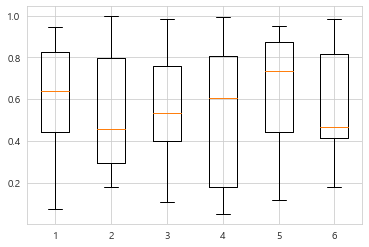

In [361]:
plt.boxplot(df_b.T)
plt.show()

In [362]:
df_c = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])

In [363]:
df_c.head()

,A,B,C,D,E
0,0.307049,0.375432,0.243553,0.162592,0.470908
1,0.946255,0.816258,0.356425,0.293377,0.596986
2,0.777434,0.618414,0.395111,0.327337,0.214357
3,0.422368,0.308170,0.463605,0.437184,0.182767
4,0.931406,0.763486,0.207246,0.394561,0.542357


<AxesSubplot:>

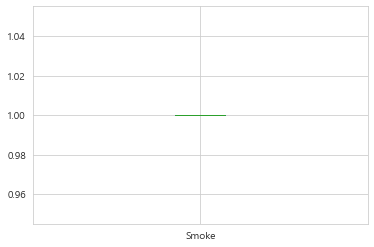

In [364]:
df.plot.box()

In [365]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')

<AxesSubplot:>

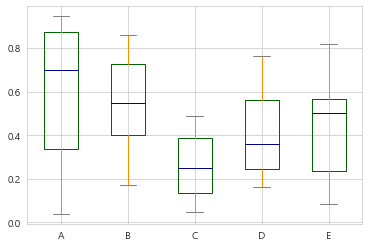

In [366]:
df_c.plot.box(color=color, sym='r+')

<AxesSubplot:>

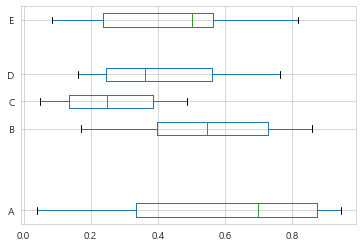

In [367]:
df_c.plot.box(vert=False, positions=[1, 4, 5, 6, 8])

In [368]:
members = df_a.select_dtypes(include='number')

In [369]:
members.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [370]:
members.shape

(244, 3)

In [371]:
members_ = members[:100]

<AxesSubplot:>

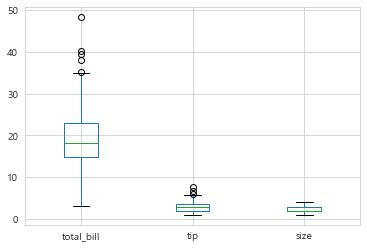

In [372]:
members_.plot(kind='box')

<AxesSubplot:>

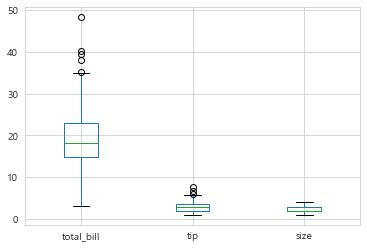

In [373]:
members_.plot.box()

## 예제 9-10  막대 그래프 그리기

In [374]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

In [375]:
df2.head()

,a,b,c,d
0,0.843266,0.183185,0.506619,0.522083
1,0.575262,0.164370,0.828224,0.584029
2,0.641475,0.246053,0.080128,0.672051
3,0.754700,0.657890,0.702239,0.041359
4,0.179737,0.575565,0.656998,0.208492


<AxesSubplot:>

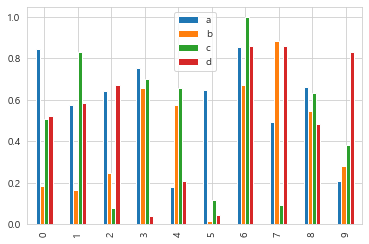

In [376]:
df2.plot.bar()

<AxesSubplot:>

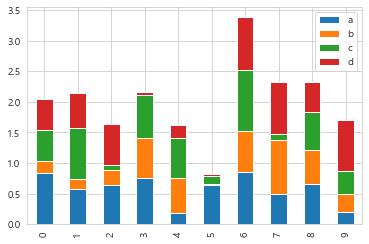

In [377]:
df2.plot.bar(stacked=True)

<AxesSubplot:>

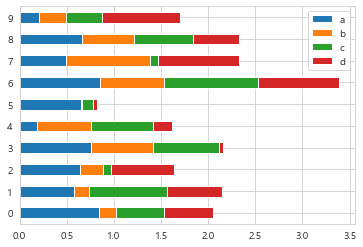

In [378]:
df2.plot.barh(stacked=True)

In [379]:
df_a.iloc[:5]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:>

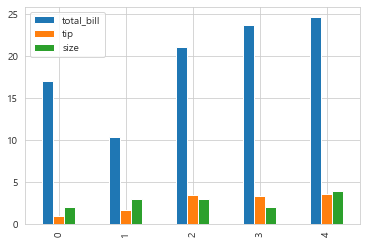

In [380]:
df_a.iloc[:5].plot(kind='bar')

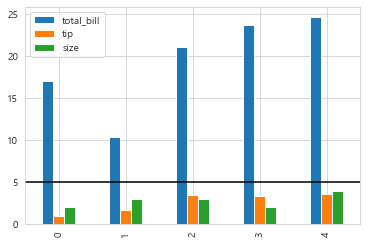

In [381]:
df_a.iloc[:5].plot.bar()
plt.axhline(5, color='k')